# Load packages

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import minimize
from scipy.stats import gumbel_r
from matplotlib.pyplot import cm
import math
import matplotlib
import matplotlib.colors as mcolors
from scipy.optimize import fsolve

import sympy
from sympy import *
from sympy import symbols, Eq, solve
from shapely.geometry import LineString


%matplotlib inline
import warnings
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cmasher as cmr
# plt.style.use('ggplot')
import matplotlib.ticker as mtick
from scipy.stats import norm
from matplotlib import pyplot, transforms
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os



Input = 'Input18'
output = 'Output13'

colors2 = ['#6CC24A','#FFB81C', '#A50034'] # groen geel rood
colors4 = [ '#A50034', '#FFB81C', '#6CC24A'] # rood geel groen
colors = ['#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw
c3 = ['#009B77', '#6CC24A', '#FFB81C', '#EC6842', '#A50034', '#6F1D77', '#EF60A3'] # groen groen geel oranjerood paarsrood paars roze
c4 = ['#6CC24A', '#FFB81C', '#EC6842', '#A50034', '#6F1D77'] # groen geel oranjerood paarsrood paars
colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034'] # donkergroen groen geel oranje rood

# Load data

In [26]:
p = '..'

version = 'Version_3_20230303'


GB = pd.read_csv(f'{p}/Inputs/{version}/GB.csv', index_col=0)
USA = pd.read_csv(f'{p}/Inputs/{version}/USA.csv', index_col=0)
FR = pd.read_excel(f'{p}/Inputs/{version}/FR.xlsx', index_col=0)
BE = pd.read_excel(f'{p}/Inputs/{version}/BE.xlsx', index_col=0)

datasets = [GB, USA, BE, FR]
dataset_names = ['CAMELS GB', 'CAMELS USA', 'Meuse', 'Meuse']
dataset_names_complete = ['CAMELS GB', 'CAMELS USA', 'Meuse BE', 'Meuse FR']
colorsTU = ['#FFB81C', '#00B8C8', '#6F1D77','#6F1D77']

yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl_USA = ['1981 - 1989', '1990 - 1999', '2000 - 2009']
yrsl_be = ['1996 - 2005', '2006 - 2015']
yrsl_fr = ['1986 - 1995', '1996 - 2005', '2006 - 2015']


yrsls = [yrsl_GB, yrsl_USA, yrsl_be, yrsl_fr]

print(len(FR))
print(len(BE))
print(len(USA))
print(len(GB))

print(len(FR)+len(BE)+len(USA)+len(GB))

set(FR.keys()).intersection(set(GB.keys()))

dataset = 'all'

9
13
169
95
286


In [27]:
folder = 'Budyko' 

if not os.path.exists(f'../Outputs/{dataset}/{folder}/'):
    print('created')
    os.makedirs(f'../Outputs/{dataset}/{folder}/')

path = f'../Outputs/{dataset}/{folder}/'

# 1. Normal Budyko plot

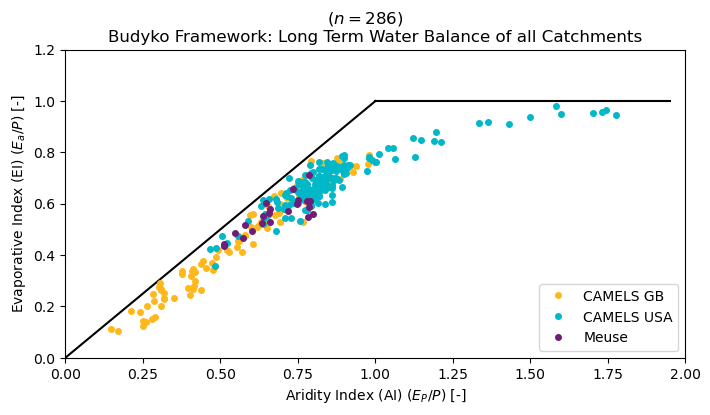

In [28]:
plt.figure(figsize=(8,4))

budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0

plt.ylabel(f"Evaporative Index (EI) ($E_a/P$) [-]")
plt.xlabel(f"Aridity Index (AI) ($E_P/P$) [-]")
# plt.minorticks_on()
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
plt.title('Budyko Framework: Long Term Water Balance of all Catchments')

num = []

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        plt.plot(AI, EI, marker='.', c = colorsTU[u], alpha=1, markersize = 8)
        num.append(AI)
        
legend_el = [Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[0], markerfacecolor=colorsTU[0], label=dataset_names[0], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[1], markerfacecolor=colorsTU[1], label=dataset_names[1], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[2], markerfacecolor=colorsTU[2], label=dataset_names[2], markersize = 8)]

plt.legend(handles=legend_el, loc='lower right')
plt.suptitle(f'($n={len(num)})$')
plt.xlim(0, 2)
plt.ylim(0,1.2)



plt.savefig(f'{path}1_Budyko_normal_v1.png')   

# 2. Plot Sr values in Budyko

## Total time period

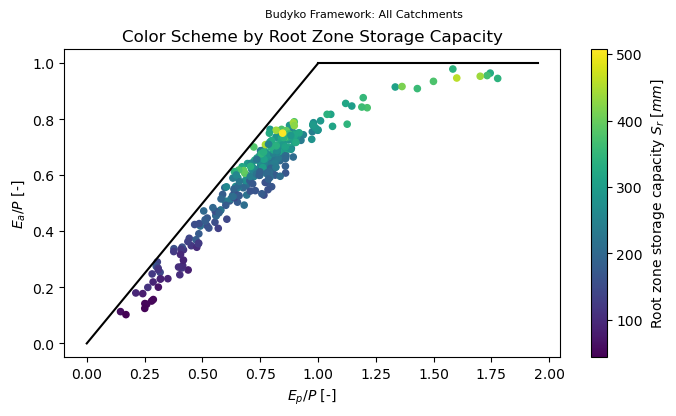

In [29]:
plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel(f"$E_a /P$ [-]")
plt.xlabel(f"$E_p /P$ [-]")
# plt.minorticks_on()
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
plt.suptitle('Budyko Framework: All Catchments', fontsize = 8)
plt.title('Color Scheme by Root Zone Storage Capacity')
AI_total = []
EI_total = []
Sr_total = []

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        Sr = dataset.iloc[i]['Sr']
        
        AI_total.append(AI)
        EI_total.append(EI)
        Sr_total.append(Sr)
        
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='viridis', s=20)
plt.colorbar(label=f'Root zone storage capacity $S_r$ [$mm$]')    
    
plt.savefig(f'{path}2_Budyko_colored_Sr.png')   

## Sr deviations per decade (per dataset)

In [35]:
GB1 = GB.loc[:, 'Sr deviation 1980 - 1989']
GB2 = GB.loc[:, 'Sr deviation 1990 - 1999']
GB3 = GB.loc[:, 'Sr deviation 1990 - 1999']
USA1 = USA.loc[:, 'Sr deviation 1990 - 1999']
USA2 = USA.loc[:, 'Sr deviation 2000 - 2009']
FR1 = FR.loc[:, 'Sr deviation 1999 - 2008']
FR2 = FR.loc[:, 'Sr deviation 2009 - 2018']
BE1 = BE.loc[:, 'Sr deviation 2009 - 2018']


dfs = [GB1, GB2, GB3, USA1, USA2, FR1, FR2, BE1]

combo_SR = pd.DataFrame()
combo_SR['SR_dev'] = 0

for i in dfs:
    
    

In [ ]:
n = 0
index = np.arange(1, 6)

dfs = []

fig, ax = plt.subplots(2, 5, figsize=(30, 7.5), sharey=True)

# def narrow_range(angle, clim_angle, lulc_angle):
#     if angle < clim_angle:
#         return angle +np.pi/4
#     elif angle > lulc_angle:
#         return angle - np.pi/4
#     else:
#         return angle
def narrow_range(angle, clim_angle, lulc_angle):  # narrow range, where we want to know what 
    if angle < clim_angle:
        return angle + (clim_angle - angle)
    elif angle > lulc_angle:
        return lulc_angle - (angle - lulc_angle)
    else:
        return angle
    
def check(angle, clim_angle, lulc_angle):
    return angle >= clim_angle and angle <= lulc_angle


for i, (group, df) in enumerate(grouped):

    y = df['d_EI']
    x = df['d_AI']

    catch = df['catchment_name']
    dec = df['decade_ending']

    mu_x = np.mean(x)
    mu_y = np.mean(y)

    # Get the angle and magnitude of each data point
    angles = np.arctan2(y, x)
    magnitudes = np.sqrt(x**2 + y**2)

    clim_angle = w_slope_rad[n] 
    lulc_angle = w_slope_rad[n] + np.pi/2

    abs_angles = [positive_dir(angle) for angle in angles]
    narrow_angles = [narrow_range(angle, clim_angle, lulc_angle) for angle in abs_angles]

    checking = [check(angle, clim_angle, lulc_angle) for angle in narrow_angles]
    
    lulc_pct = (narrow_angles - clim_angle)/(lulc_angle - clim_angle) #absolute angle difference equivalent to 45 degrees is equal contribution
    clim_pct = (lulc_angle - narrow_angles)/(lulc_angle - clim_angle) #absolute angle difference equivalent to 45 degrees is equal contribution
    
    df['clim_pct_con'] = clim_pct
    df['lulc_pct_con'] = lulc_pct
    
    # Create bins for the angles
    bins = np.linspace(0, np.pi, num=36)
    
    hist, _ = np.histogram(narrow_angles, bins=bins)
        
    ax = plt.subplot(1,5, index[n])

    ax.bar(bins[:-1], hist, width=2*np.pi/36/2, align='edge', bottom=0, color=colors5[n])
    
    ax.axvspan(w_slope_rad[n] + (2*np.pi/72), w_slope_rad[n] - (2*np.pi/72), alpha=0.2, color='red', label = 'climatic shift')
            
    ax.axvspan(w_slope_rad[n] + np.pi/2 + (2*np.pi/72), w_slope_rad[n]+ np.pi/2 - (2*np.pi/72), alpha=0.2, color='green', label='land change shift')
    
    ax.set_ylim(0, 35)
    
    ax.set_xlim(w_slope_rad[n] - (2*np.pi/72) * 0.75, w_slope_rad[n] + np.pi/2 + (2*np.pi/72) *1.25)
    
    ax.set_title(f'Aridity group {group}\n sample n: {len(df)}')
    
    dfs.append(df)
    
    #display(df.corr().loc[:, 'clim_pct_con'].sort_values())
    
    print('No angles are plotting out of range:', np.any(checking is not False))
    print(f'mean climatic contribution percent group {group} = {clim_pct.mean()}')
    
    n+=1



,AI,EI,Sr,AI 1970 - 1979,EI 1970 - 1979,omega 1970 - 1979,P 1970 - 1979,Ep 1970 - 1979,T 1970 - 1979,SI 1970 - 1979,...,ST_change 2000 - 2009,Sr expected 1980 - 1989,Sr expected 1990 - 1999,Sr expected 2000 - 2009,Sr deviation 1980 - 1989,Sr relative 1980 - 1989,Sr deviation 1990 - 1999,Sr relative 1990 - 1999,Sr deviation 2000 - 2009,Sr relative 2000 - 2009
ID,,,,,,,,,,,,,,,,,,,,,
17005,0.452201,0.348859,118.551469,0.510905,0.427966,2.351813,2.468520,1.261180,7.816810,0.221090,...,0.006727,149.570686,119.071847,77.532391,-33.313441,-0.286549,0.874532,0.007291,-4.727789,-0.064938
18001,0.305205,0.290875,138.402186,0.340352,0.321266,2.727040,3.595078,1.223593,7.210885,0.243906,...,0.024084,169.402854,132.300590,105.199581,1.793325,0.010475,7.921043,0.056489,-16.133984,-0.181147
20007,0.596979,0.556475,199.734570,0.641412,0.569248,3.157328,1.929707,1.237738,7.376863,0.162558,...,0.057464,189.853628,241.582221,167.967916,19.889303,0.094827,6.295025,0.025396,-7.874046,-0.049184
21017,0.251309,0.142306,48.184454,0.274778,0.157966,1.390134,4.507946,1.238685,6.115895,0.259361,...,0.063801,53.477701,39.884877,33.897016,-15.509046,-0.408470,4.857635,0.108569,9.613437,0.220945
21023,0.745047,0.606516,197.808187,0.790240,0.669097,3.305172,1.678855,1.326699,8.219882,0.137842,...,0.004290,192.248561,227.609183,197.151278,-21.444078,-0.125548,28.375699,0.110849,-36.746430,-0.229086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79002,0.309349,0.263076,112.961888,0.339329,0.291512,2.101769,3.733309,1.266820,7.257067,0.304973,...,0.060675,131.967060,103.407350,78.708026,-15.021937,-0.128453,4.420531,0.040996,11.902696,0.131361
79004,0.282749,0.248129,120.176010,0.310160,0.266233,2.040899,4.161104,1.290609,7.129852,0.312097,...,0.087573,133.371561,114.683690,90.127075,-4.589817,-0.035640,10.211961,0.081764,-1.101722,-0.012375
8009,0.405524,0.317355,96.561642,0.446784,0.330654,1.849602,2.528168,1.129545,5.607328,0.180497,...,0.043948,107.534927,97.926063,92.032729,-9.458437,-0.096439,32.848673,0.251185,-8.567641,-0.102649


KeyError: 'AI 1981 - 1990'

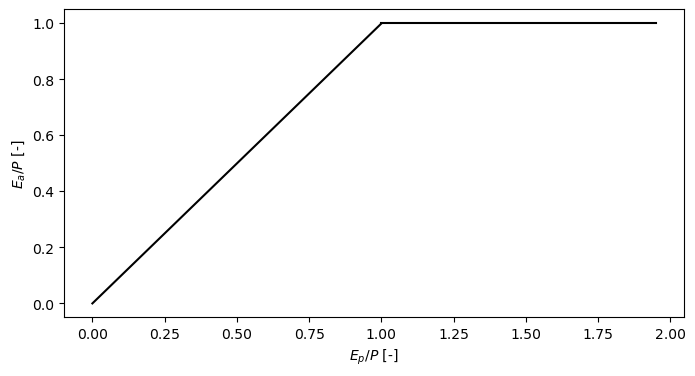

In [54]:
for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    display(dataset)
    for j in range(len(yrsl)):
        if j > 0:            
            AI_total = []
            EI_total = []
            Sr_total = []
            fig = plt.figure(figsize=(8,4))
            # fig.set_facecolor('xkcd:mint green')
            budyko_curve_x = np.arange(1, 2, 0.05)
            energy_limit_x = np.arange(0, 1.0001, 0.05)
            x = np.arange(0, 1.0001, 0.05)
            water_limit_y = 1 + budyko_curve_x*0
            energy_limit_y = energy_limit_x
            y = 1 + x*0
            plt.ylabel(f"$E_a /P$ [-]")
            plt.xlabel(f"$E_p /P$ [-]")
            plt.plot(energy_limit_x, energy_limit_y, c='k')
            plt.plot(budyko_curve_x, water_limit_y,c='k')
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                
            cmap = cmr.prinsenvlag
            plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=40)
            plt.colorbar(label='Error in estimating root zone storage capacity [mm]')#, vmin=-80, vmax = 150)   
            plt.clim(-150, 150)
            plt.title(f'{dataset_names_complete[u]}, {yrsl[j]}')
    
            plt.savefig(f'{path}2_Deviation_Sr_{dataset_names_complete[u]}, {yrsl[j]}.png')   
            plt.close(fig)

## Sr deviations combined

KeyError: 'AI 1981 - 1990'

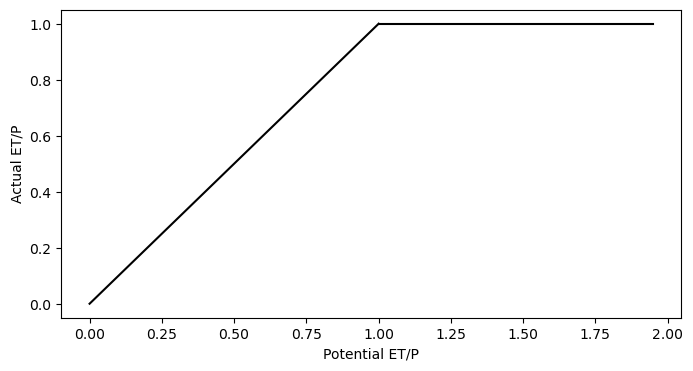

In [10]:
AI_total = []
EI_total = []
Sr_total = []

fig = plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

min_dev = 0
max_dev = 0

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                if Sr_dev > max_dev:
                    max_dev = Sr_dev
                if Sr_dev < min_dev:
                    min_dev = Sr_dev
                
cmap = cmr.pride
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=20)
plt.colorbar(label='Error in estimating root zone storage capacity [mm]')   
# plt.title(f'Sr deviations total')
plt.clim(-150, 150)    
plt.savefig(f'outputs/Budyko/2_Deviation_Sr_all.png')   

print(min_dev, max_dev)

## Sr deviations relative per decade (per dataset)

CAMELS GB


KeyError: 'AI 1981 - 1990'

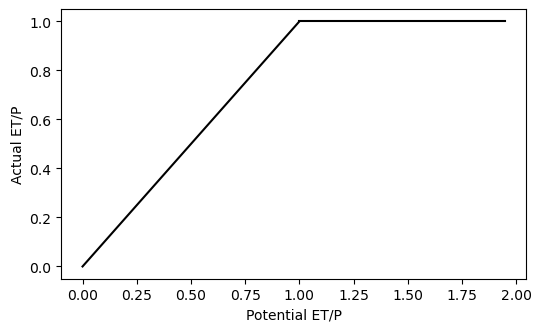

In [11]:
for u in range(len(datasets)):
    dataset = datasets[u]
    print(dataset_names[u])
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            AI_total = []
            EI_total = []
            Sr_total = []
            fig = plt.figure(figsize=(6,3.5))
            # fig.set_facecolor('xkcd:mint green')
            budyko_curve_x = np.arange(1, 2, 0.05)
            energy_limit_x = np.arange(0, 1.0001, 0.05)
            x = np.arange(0, 1.0001, 0.05)
            water_limit_y = 1 + budyko_curve_x*0
            energy_limit_y = energy_limit_x
            y = 1 + x*0
            plt.ylabel("Actual ET/P")
            plt.xlabel("Potential ET/P")
            plt.plot(energy_limit_x, energy_limit_y, c='k')
            plt.plot(budyko_curve_x, water_limit_y,c='k')
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']*100
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev_rel)
                
            cmap = cmr.prinsenvlag
            plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=40)
            plt.colorbar(label='Error in estimating root zone storage capacity', format='%.0f%%')   
            plt.clim(-100, 100)
            plt.title(f'{dataset_names_complete[u]}, {yrsl[j]}')
    
            plt.savefig(f'2_Output/{output}/2_Relative_Deviation_Sr_{dataset_names_complete[u]}, {yrsl[j]}.png')   
            plt.close(fig)

## Sr deviations combined relative

KeyError: 'AI 1981 - 1990'

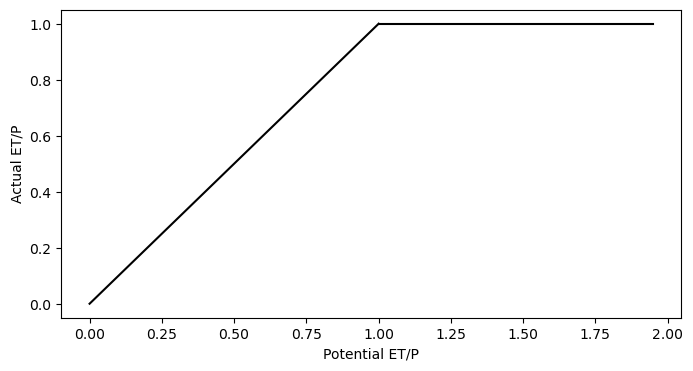

In [13]:
AI_total = []
EI_total = []
Sr_total = []

fig = plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

min_dev = 0
max_dev = 0

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']*100
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev_rel)
                if Sr_dev > max_dev:
                    max_dev = Sr_dev
                if Sr_dev < min_dev:
                    min_dev = Sr_dev
                
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=20)
plt.colorbar(label='Error in estimating root zone storage capacity', format='%.0f%%')   
plt.clim(-100, 100)
plt.savefig(f'output/Budyko/2_Relative_Deviation_Sr_all.png')   

print(min_dev, max_dev)

# 3. Budyko with ranges

In [44]:
def w_function(AI, w):
    EI = 1 + AI - (1 + (AI**w))**(1/w)
    return EI

## Arrays maken van EI, AI en EI_dev (en nu ook Sr)

In [45]:
nr = 11

nrs = np.linspace(0, 2, nr)

EI_mean_total = [[], [], [], [], [], [], [], [], [], []]
AI_mean_total = [[], [], [], [], [], [], [], [], [], []]
EI_dev_total = [[], [], [], [], [], [], [], [], [], []]
Sr_dev_total = [[], [], [], [], [], [], [], [], [], []]
Sr_dev_rel_total = [[], [], [], [], [], [], [], [], [], []]


for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']  
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']  
                
                
                for n in range(len(nrs)):
                    if nrs[n] <= AI < nrs[n+1]:
                        EI_mean_total[n].append(EI)
                        EI_dev_total[n].append(EI_dev)
                        AI_mean_total[n].append(AI)
                        Sr_dev_total[n].append(Sr_dev)
                        Sr_dev_rel_total[n].append(Sr_dev_rel)
                        
EI_mean = np.zeros(nr-1)
AI_mean = np.zeros(nr-1)

for n in range(len(EI_mean_total)):
    EI_mean[n] = np.mean(EI_mean_total[n])
    AI_mean[n] = np.mean(AI_mean_total[n])

KeyError: 'AI 1981 - 1990'

## Plotjes maken van EI_dev per groep en opslaan

In [51]:
n_working = []
c = 0
for n in range(len(EI_dev_total)):
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(12.5)
    fig.set_figwidth(4)

    EI_dev = EI_dev_total[n]
    
    EI_dev_neg = []
    EI_dev_pos = []
    
    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
            
    length = len(EI_dev)

    if length > 10:
        plt.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        plt.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        plt.ylim(-0.2, 0.2)
        axs.get_xaxis().set_visible(False)
        axs.get_yaxis().set_visible(False)
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        axs.spines['bottom'].set_visible(False)
        axs.spines['left'].set_visible(False)
        frameon=False
        plt.savefig(f'{path}/3_EI_dev_{n}.png', transparent=True)  
        n_working.append(n)
        c += 1

    plt.close()

## Budyko summary plot EI deviations (originele formaat)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2200x1600 with 0 Axes>

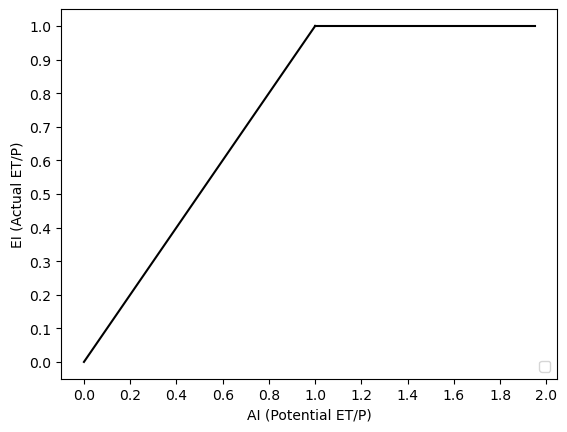

In [49]:
fig = plt.figure(figsize=(22,16))
fig, ax = plt.subplots()
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("EI (Actual ET/P)")
plt.xlabel("AI (Potential ET/P)")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
# ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# ax.set_xticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
ax.set_xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])



def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.1)

AI_working = []
AI_graph = []
EI_working = []
paths = []
c=0

for n in (n_working):
    EI = float(EI_mean[n])
    AI = float(AI_mean[n])
    AI_plus = AI+0.1
    
    AI_working.append(AI)
    AI_graph.append(AI_plus)
    EI_working.append(EI)
    
    n_dev = len(EI_dev_total[n]) 
    print(n_dev)
        
    label = f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {n_dev})'

    # plt.plot(AI, EI, 'o', color=colors5[c])
    

    # solve normal
    
    EI_line = np.linspace(EI, EI, 100000)
    w_array = np.linspace(0, 15, 100000)
    Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)

    first_line = LineString(np.column_stack((w_array, EI_line)))
    second_line = LineString(np.column_stack((w_array, Eq_tosolve)))
    intersection = first_line.intersection(second_line)

    w = intersection.x
    
    # plot w function
    AI_array = np.arange(nrs[n], nrs[n+1], 0.01)
    # AI_array = np.arange(0, 2, 0.05)
    EI_out = w_function(AI_array, w)
    plt.plot(AI_array, EI_out, linewidth = 3, label = label, color=colors5[c])
    
    paths.append(f'{path}/3_EI_dev_{n}.png')
    c+=1
    
    
for x0, y0, path in zip(AI_graph, EI_working, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.legend(loc = 'lower right')
plt.savefig(f'{path}3_Budyko_image_EI_deviations.png')  

## Budyko summary plot EI deviations (nieuw formaat)

72
94
236
192


C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_20012\3695589763.py:46: RuntimeWarning: divide by zero encountered in divide
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)
C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_20012\3695589763.py:46: RuntimeWarning: overflow encountered in power
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)


24


<Figure size 200x800 with 0 Axes>

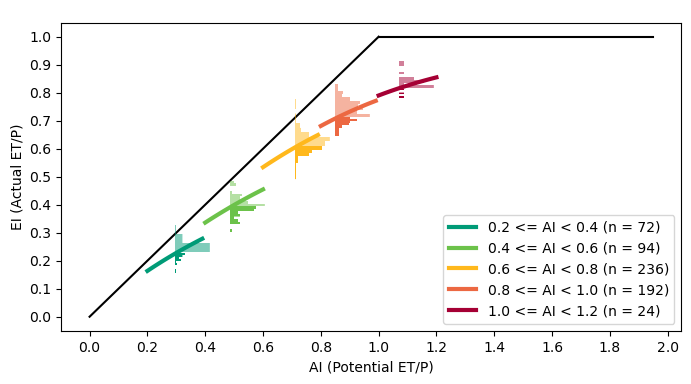

In [13]:
fig = plt.figure(figsize=(2,8))
fig, ax = plt.subplots(figsize=(8, 4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("EI (Actual ET/P)")
plt.xlabel("AI (Potential ET/P)")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
# ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])



def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.083)

AI_working = []
AI_graph = []
EI_working = []
paths = []
c=0

for n in (n_working):
    EI = float(EI_mean[n])
    AI = float(AI_mean[n])
    AI_plus = AI+0.05
    
    AI_working.append(AI)
    AI_graph.append(AI_plus)
    EI_working.append(EI)
    
    n_dev = len(EI_dev_total[n]) 
    print(n_dev)
        
    label = f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {n_dev})'

    
    EI_line = np.linspace(EI, EI, 100000)
    w_array = np.linspace(0, 15, 100000)
    Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)

    first_line = LineString(np.column_stack((w_array, EI_line)))
    second_line = LineString(np.column_stack((w_array, Eq_tosolve)))
    intersection = first_line.intersection(second_line)

    w = intersection.x
    
    # plot w function
    AI_array = np.arange(nrs[n], nrs[n+1], 0.01)
    EI_out = w_function(AI_array, w)
    plt.plot(AI_array, EI_out, linewidth = 3, label = label, color=colors5[c])
    
    paths.append(f'2_Output/{output}/3_EI_dev_{n}.png')
    c+=1
    
    
for x0, y0, path in zip(AI_graph, EI_working, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.legend(loc = 'lower right')
plt.savefig(f'2_Output/{output}/3_Budyko_image_EI_deviations.png')  

In [23]:
72+94+236+192+24

618

### Plotjes EI_dev met details (5 aparte)

In [14]:
n_working = []
c = 0
for n in range(len(EI_dev_total)):
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(9.371)
    fig.set_figwidth(3)

    EI_dev = EI_dev_total[n]
    
    EI_dev_neg = []
    EI_dev_pos = []
    
    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
            
    length = len(EI_dev)

    if length > 10:
        plt.title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {length})')
        plt.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        plt.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        plt.ylim(-0.2, 0.2)
        # axs.get_xaxis().set_visible(False)
        # axs.get_yaxis().set_visible(False)
        # axs.spines['top'].set_visible(False)
        # axs.spines['right'].set_visible(False)
        # axs.spines['bottom'].set_visible(False)
        # axs.spines['left'].set_visible(False)
        frameon=False
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        
        mu = np.mean(EI_dev)
        p10 = np.percentile(EI_dev, 10)
        # p50 = np.percentile(EI_dev, 50)
        p90 = np.percentile(EI_dev, 90)
        
        plt.axhline(mu, color='grey', linewidth=2)
        plt.axhline(p10, color='grey', linewidth=2, linestyle='--')
        plt.axhline(p90, color='grey', linewidth=2, linestyle='--')

        

        
        # textstr = f'mean = {mu:.1} \n90th percentile = {p90:.1} \n50th percentile = {p50:.1} \n10th percentile = {p10:.1}'
        textstr = f'mean = {mu:.1} \n90th percentile = {p90:.1} \n10th percentile = {p10:.1}'

        
        
        # place a text box in upper left in axes coords
        axs.text(-0.05, 0.38, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
        
        plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr{n}.png', transparent=False)  
        n_working.append(n)
        c += 1

    plt.close()

### Plotjes EI_dev met details (1 plaatjes)

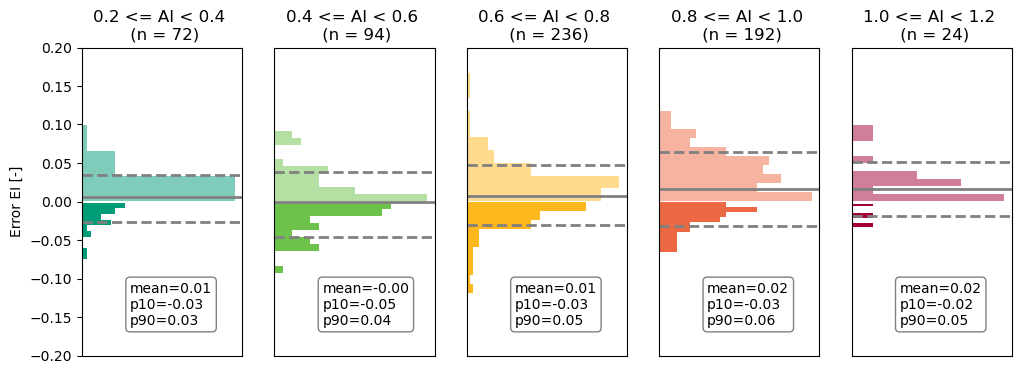

In [15]:
fig, axs = plt.subplots(1, 5)
fig.set_figheight(4)
fig.set_figwidth(12)
c = 0
for n in range(len(EI_dev_total)):
    EI_dev = EI_dev_total[n]
    EI_dev_neg = []
    EI_dev_pos = []

    mu = np.mean(EI_dev)
    p10 = np.percentile(EI_dev, 10)
    p90 = np.percentile(EI_dev, 90)

    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
    length = len(EI_dev)
    if length > 10:
        ax = axs[c]
        ax.set_title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} \n (n = {length})')
        ax.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        ax.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        ax.set_ylim(-0.2, 0.2)

        ax.axhline(mu, color='grey', linewidth=2)
        ax.axhline(p10, color='grey', linewidth=2, linestyle='--')
        ax.axhline(p90, color='grey', linewidth=2, linestyle='--')
        
        ax.annotate(f"mean={mu:.2f}\np10={p10:.2f}\np90={p90:.2f}", (0.3, 0.1), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))

        # code for formatting and adding text
        if c != 0:
            ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        if c == 0:
            ax.set_ylabel('Error EI [-]')
        c += 1
plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr.png', transparent=False)


## Violin plots in one image (WORKING)

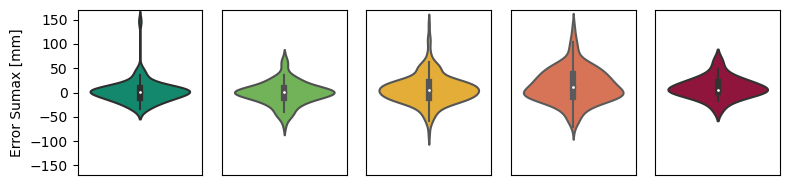

In [20]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(8, 2))

c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    length = len(Sr_dev)
    if length > 10:
        sns.violinplot(Sr_dev, ax=axs[c], color=colors5[c])
        axs[c].set_ylim(-170, 170)
        axs[c].set_ylabel('Error Sumax [mm]')
        axs[c].set_xticks([])
        axs[c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
        if c != 0:
            axs[c].yaxis.set_visible(False)
            # axs[c].spines['top'].set_visible(False)
            # axs[c].spines['right'].set_visible(False)
            # axs[c].spines['bottom'].set_visible(False)
            # axs[c].spines['left'].set_visible(False)
        n_working.append(n)
        c += 1

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin.png', transparent=True)  
plt.tight_layout()


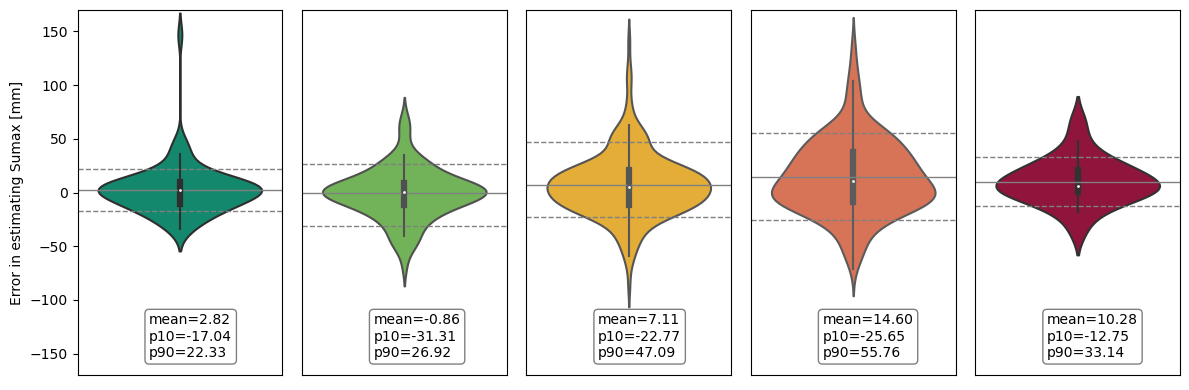

In [17]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    length = len(Sr_dev)
    
    mu = np.mean(Sr_dev)
    p10 = np.percentile(Sr_dev, 10)
    p90 = np.percentile(Sr_dev, 90)
    
    if length > 10:
        sns.violinplot(Sr_dev, ax=axs[c], color=colors5[c]) 
        axs[c].set_ylim(-170, 170)
        axs[c].set_ylabel('Error in estimating Sumax [mm]')
        axs[c].set_xticks([])
        axs[c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
        
        axs[c].axhline(mu, color='grey', linewidth=1)
        axs[c].axhline(p10, color='grey', linewidth=1, linestyle='--')
        axs[c].axhline(p90, color='grey', linewidth=1, linestyle='--')
        axs[c].annotate(f"mean={mu:.2f}\np10={p10:.2f}\np90={p90:.2f}", (0.35, 0.05), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))


        if c != 0:
            axs[c].yaxis.set_visible(False)
        n_working.append(n)
        c += 1
    

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin.png', transparent=True)  
plt.tight_layout()


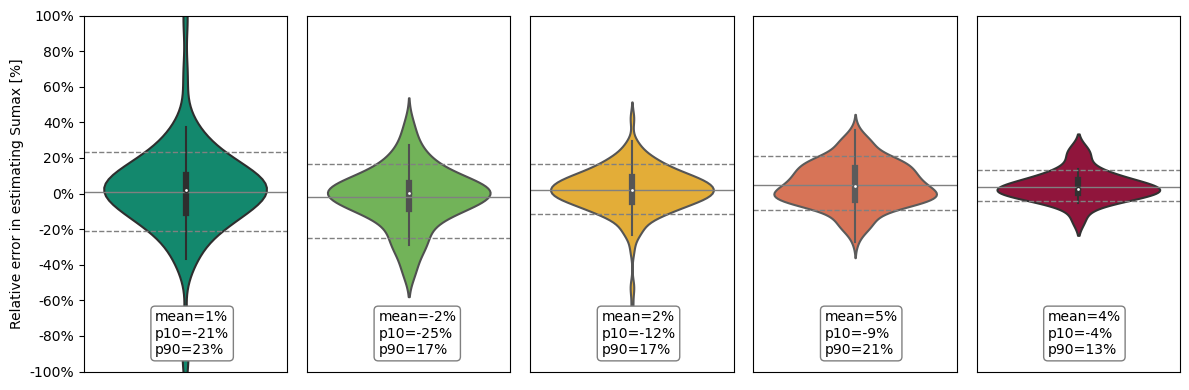

In [18]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

c = 0
for n in range(len(Sr_dev_rel_total)):
    Sr_dev_rel = Sr_dev_rel_total[n]
    length = len(Sr_dev_rel)
    
    mu = np.mean(Sr_dev_rel)
    p10 = np.percentile(Sr_dev_rel, 10)
    p90 = np.percentile(Sr_dev_rel, 90)
    
    if length > 10:
        sns.violinplot(Sr_dev_rel, ax=axs[c], color=colors5[c]) 
        axs[c].set_ylim(-1, 1)
        axs[c].set_ylabel('Relative error in estimating Sumax [%]')
        axs[c].set_xticks([])
        
        axs[c].axhline(mu, color='grey', linewidth=1)
        axs[c].axhline(p10, color='grey', linewidth=1, linestyle='--')
        axs[c].axhline(p90, color='grey', linewidth=1, linestyle='--')
        axs[c].annotate(f"mean={mu:.0%}\np10={p10:.0%}\np90={p90:.0%}", (0.35, 0.05), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))
        axs[c].set_yticks(np.linspace(-1, 1, 11))
        axs[c].set_yticklabels(['-100%', '-80%', '-60%', '-40%', '-20%', '0%', '20%', '40%', '60%', '80%', '100%'])
        if c != 0:
            axs[c].yaxis.set_visible(False)
        n_working.append(n)
        c += 1
    

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin_rel.png', transparent=True)  
plt.tight_layout()
